In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.56.0-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
                                              0.0/181.8 kB ? eta -:--:--
     --------                              41.0/181.8 kB 653.6 kB/s eta 0:00:01
     --------------------                 102.4/181.8 kB 980.4 kB/s eta 0:00:01
     ----------------------------------     163.8/181.8 kB 1.2 MB/s eta 0:00:01
   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
from sklearn.model_selection import train_test_split # for splitting dataset
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics # for checking the model accuracy
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
import tensorflow as tf
from pandas import DataFrame, Series
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback
from imblearn.over_sampling import SMOTE

In [3]:
humidity = pd.read_csv("data/humidity.csv")
temp = pd.read_csv("data/temperature.csv")
pressure = pd.read_csv("data/pressure.csv")
city=pd.read_csv('data/city_attributes.csv')
descrip=pd.read_csv('data/weather_description.csv')
winddir=pd.read_csv('data/wind_direction.csv')
windspeed=pd.read_csv('data/wind_speed.csv')

In [4]:
humidity.shape

(45253, 37)

In [5]:
temp.shape

(45253, 37)

In [6]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [7]:
humidity.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,43427.000000,44804.000000,44311.000000,44964.000000,45101.000000,44909.000000,44411.000000,43945.000000,44543.000000,43445.000000,...,44629.000000,43629.000000,43557.000000,44804.000000,44394.000000,44140.000000,44283.000000,44435.000000,44436.000000,44347.000000
mean,81.895480,74.697616,76.875042,77.159038,62.773841,67.784809,31.937831,37.484424,45.186157,53.022557,...,68.017769,66.642417,71.861538,77.375301,70.604857,66.861509,53.155184,79.800383,78.606760,68.732293
std,14.522221,19.042656,17.396016,18.147464,21.818042,19.419307,20.041855,21.662728,23.336546,23.905392,...,18.790524,19.874727,16.825027,18.750190,21.321606,16.464177,27.305008,23.051692,23.682244,19.273881
min,12.000000,10.000000,6.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,10.000000,10.000000,7.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,73.000000,63.000000,68.000000,66.000000,48.000000,56.000000,16.000000,21.000000,26.000000,33.000000,...,54.000000,51.000000,60.000000,65.000000,54.000000,58.000000,31.000000,63.000000,61.000000,56.000000
50%,86.000000,80.000000,81.000000,81.000000,66.000000,71.000000,27.000000,32.000000,42.000000,52.000000,...,68.000000,68.000000,74.000000,81.000000,77.000000,69.000000,48.000000,89.000000,87.000000,70.000000
75%,93.000000,90.000000,89.000000,93.000000,81.000000,82.000000,43.000000,50.000000,63.000000,73.000000,...,84.000000,83.000000,86.000000,93.000000,88.000000,78.000000,75.000000,100.000000,100.000000,83.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
Boston=(humidity[['datetime','Boston']].merge(temp[['datetime','Boston']],on='datetime').merge(pressure[['datetime','Boston']], on='datetime').merge(windspeed[['datetime','Boston']], on='datetime').merge(winddir[['datetime','Boston']], on='datetime').merge(descrip[['datetime','Boston']], on='datetime'))


C:\Users\rimon\AppData\Local\Temp\ipykernel_3460\3383274675.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Boston_x'} in the result is deprecated and will raise a MergeError in a future version.
  Boston=(humidity[['datetime','Boston']].merge(temp[['datetime','Boston']],on='datetime').merge(pressure[['datetime','Boston']], on='datetime').merge(windspeed[['datetime','Boston']], on='datetime').merge(winddir[['datetime','Boston']], on='datetime').merge(descrip[['datetime','Boston']], on='datetime'))
C:\Users\rimon\AppData\Local\Temp\ipykernel_3460\3383274675.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Boston_x'} in the result is deprecated and will raise a MergeError in a future version.
  Boston=(humidity[['datetime','Boston']].merge(temp[['datetime','Boston']],on='datetime').merge(pressure[['datetime','Boston']], on='datetime').merge(windspeed[['datetime','Boston']], on='datetime').merge(winddir[['datetime','Boston']], on='datetime').

In [9]:
#weather data of Boston
Boston.columns=['datetime','humidity','temperature','pressure','windspeed','winddirection','description']
Boston.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,68.0,287.170000,1014.0,3.0,60.0,sky is clear
2,2012-10-01 14:00:00,68.0,287.186092,1014.0,3.0,60.0,few clouds
3,2012-10-01 15:00:00,68.0,287.231672,1014.0,3.0,60.0,few clouds
4,2012-10-01 16:00:00,68.0,287.277251,1014.0,3.0,60.0,few clouds


In [10]:
Boston.shape

(45253, 7)

In [11]:
Boston.describe()

,humidity,temperature,pressure,windspeed,winddirection
count,44804.000000,45250.000000,45246.000000,45252.000000,45252.000000
mean,77.375301,283.779823,1019.861314,3.380889,184.915562
std,18.750190,9.802499,9.548220,2.277266,107.763589
min,11.000000,249.540000,978.000000,0.000000,0.000000
25%,65.000000,276.090000,1014.000000,2.000000,80.000000
50%,81.000000,284.133250,1019.000000,3.000000,210.000000
75%,93.000000,291.620000,1026.000000,5.000000,272.000000
max,100.000000,308.000000,1054.000000,20.000000,360.000000


In [12]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       45253 non-null  object 
 1   humidity       44804 non-null  float64
 2   temperature    45250 non-null  float64
 3   pressure       45246 non-null  float64
 4   windspeed      45252 non-null  float64
 5   winddirection  45252 non-null  float64
 6   description    45252 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [13]:
import datetime
Boston['datetime']=pd.to_datetime(Boston['datetime'])
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       45253 non-null  datetime64[ns]
 1   humidity       44804 non-null  float64       
 2   temperature    45250 non-null  float64       
 3   pressure       45246 non-null  float64       
 4   windspeed      45252 non-null  float64       
 5   winddirection  45252 non-null  float64       
 6   description    45252 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.8+ MB


In [14]:
Boston.isnull().sum()

datetime           0
humidity         449
temperature        3
pressure           7
windspeed          1
winddirection      1
description        1
dtype: int64

In [15]:
Boston.isnull().sum()

datetime           0
humidity         449
temperature        3
pressure           7
windspeed          1
winddirection      1
description        1
dtype: int64

In [16]:
Boston.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,68.0,287.170000,1014.0,3.0,60.0,sky is clear
2,2012-10-01 14:00:00,68.0,287.186092,1014.0,3.0,60.0,few clouds
3,2012-10-01 15:00:00,68.0,287.231672,1014.0,3.0,60.0,few clouds
4,2012-10-01 16:00:00,68.0,287.277251,1014.0,3.0,60.0,few clouds


In [17]:
# Splitting Date-Time
time=pd.DatetimeIndex(Boston['datetime'])
Boston['day']=time.day
Boston['month']=time.month
Boston['year']=time.year
del Boston['datetime']

Boston

,humidity,temperature,pressure,windspeed,winddirection,description,day,month,year
0,NaN,NaN,NaN,NaN,NaN,NaN,1,10,2012
1,68.0,287.170000,1014.0,3.0,60.0,sky is clear,1,10,2012
2,68.0,287.186092,1014.0,3.0,60.0,few clouds,1,10,2012
3,68.0,287.231672,1014.0,3.0,60.0,few clouds,1,10,2012
4,68.0,287.277251,1014.0,3.0,60.0,few clouds,1,10,2012
...,...,...,...,...,...,...,...,...,...
45248,37.0,288.080000,1017.0,8.0,290.0,broken clouds,29,11,2017
45249,74.0,286.020000,1019.0,6.0,340.0,broken clouds,29,11,2017
45250,74.0,283.940000,1019.0,7.0,340.0,broken clouds,29,11,2017
45251,56.0,282.170000,1022.0,2.0,330.0,few clouds,29,11,2017


In [18]:
Boston.description

0                  NaN
1         sky is clear
2           few clouds
3           few clouds
4           few clouds
             ...      
45248    broken clouds
45249    broken clouds
45250    broken clouds
45251       few clouds
45252    broken clouds
Name: description, Length: 45253, dtype: object

In [19]:
Boston.describe()

,humidity,temperature,pressure,windspeed,winddirection,day,month,year
count,44804.000000,45250.000000,45246.000000,45252.000000,45252.000000,45253.000000,45253.000000,45253.000000
mean,77.375301,283.779823,1019.861314,3.380889,184.915562,15.725322,6.648730,2014.821051
std,18.750190,9.802499,9.548220,2.277266,107.763589,8.793919,3.464906,1.507743
min,11.000000,249.540000,978.000000,0.000000,0.000000,1.000000,1.000000,2012.000000
25%,65.000000,276.090000,1014.000000,2.000000,80.000000,8.000000,4.000000,2014.000000
50%,81.000000,284.133250,1019.000000,3.000000,210.000000,16.000000,7.000000,2015.000000
75%,93.000000,291.620000,1026.000000,5.000000,272.000000,23.000000,10.000000,2016.000000
max,100.000000,308.000000,1054.000000,20.000000,360.000000,31.000000,12.000000,2017.000000


In [20]:
Boston.groupby('description').size()

description
broken clouds                    3313
drizzle                            63
dust                                5
few clouds                       2214
fog                              1331
freezing rain                       1
haze                              234
heavy intensity drizzle             5
heavy intensity rain              425
heavy snow                        133
light intensity drizzle           176
light rain                       4828
light rain and snow                 1
light snow                        565
mist                             4803
moderate rain                    1705
overcast clouds                  4081
proximity thunderstorm             95
scattered clouds                 3459
sky is clear                    17444
snow                              265
squalls                             7
thunderstorm                       31
thunderstorm with heavy rain        6
thunderstorm with light rain       18
thunderstorm with rain              6


C:\Users\rimon\AppData\Local\Temp\ipykernel_3460\1409139502.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  change = class_occur.append(pd.Series([class_occur[9]+class_occur[10]+class_occur[11]+class_occur[12]+class_occur[13]+class_occur[14]+class_occur[15]+class_occur[16]+class_occur[17]+class_occur[18]+class_occur[19]+class_occur[20]+class_occur[21]+class_occur[22]+class_occur[23]+class_occur[24]+class_occur[25]+class_occur[26]]))


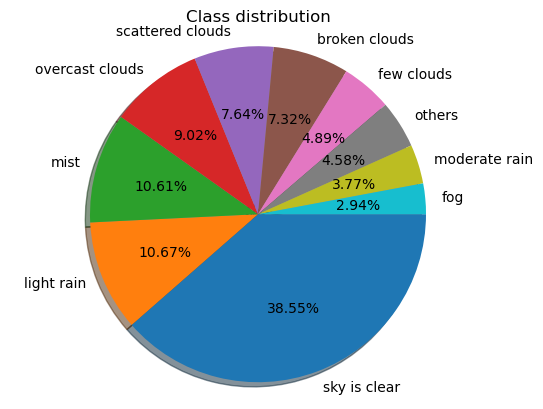

In [21]:
# Processing Data For Pie Chart
class_occur = Boston['description'].value_counts()
class_names = ['sky is clear','light rain','mist','overcast clouds','scattered clouds','broken clouds', 'few clouds','others','moderate rain','fog']
change = class_occur.append(pd.Series([class_occur[9]+class_occur[10]+class_occur[11]+class_occur[12]+class_occur[13]+class_occur[14]+class_occur[15]+class_occur[16]+class_occur[17]+class_occur[18]+class_occur[19]+class_occur[20]+class_occur[21]+class_occur[22]+class_occur[23]+class_occur[24]+class_occur[25]+class_occur[26]]))
change = change.rename(index={0: 'others'})
class_occur   = change.drop(['light snow', 'heavy intensity rain', 'snow', 'haze', 'light intensity drizzle', 'heavy snow', 'proximity thunderstorm', 'drizzle', 'very heavy rain', 'thunderstorm', 'thunderstorm with light rain', 'squalls', 'thunderstorm with rain', 'thunderstorm with heavy rain', 'dust', 'heavy intensity drizzle', 'light rain and snow', 'freezing rain']);
class_occur = class_occur.sort_values(ascending=False)

# Creating Pie Chart Of Target Class
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
       shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

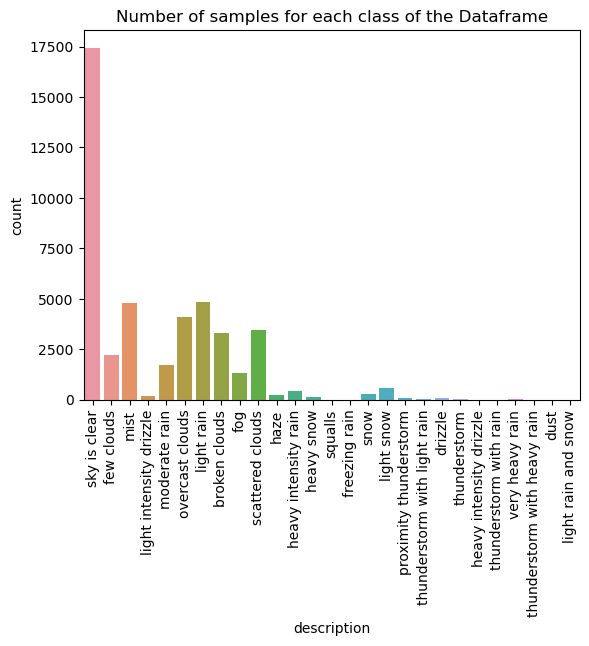

In [22]:
# Visualization of Samples of Each Target Class of The Dataframe
sns.countplot(x='description', data=Boston)

plt.xticks(rotation=90)

plt.title("Number of samples for each class of the Dataframe");

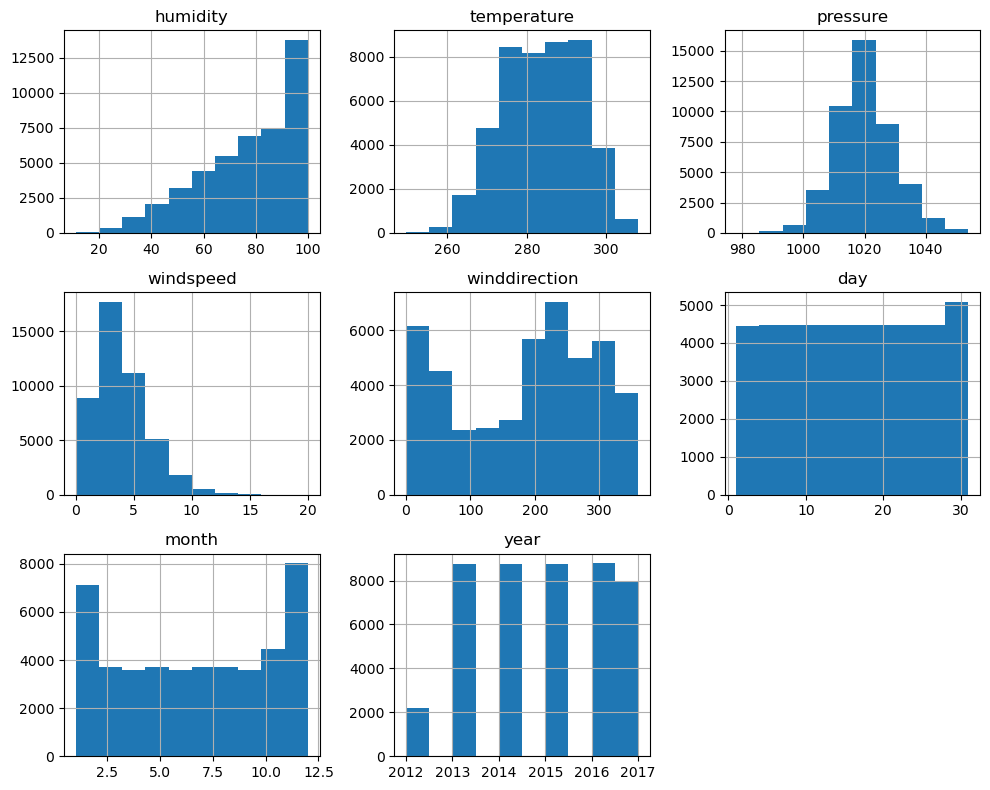

In [23]:
# Showing Histogram Of Data
fig = Boston.hist(figsize=(10,8))

plt.tight_layout()

plt.show()

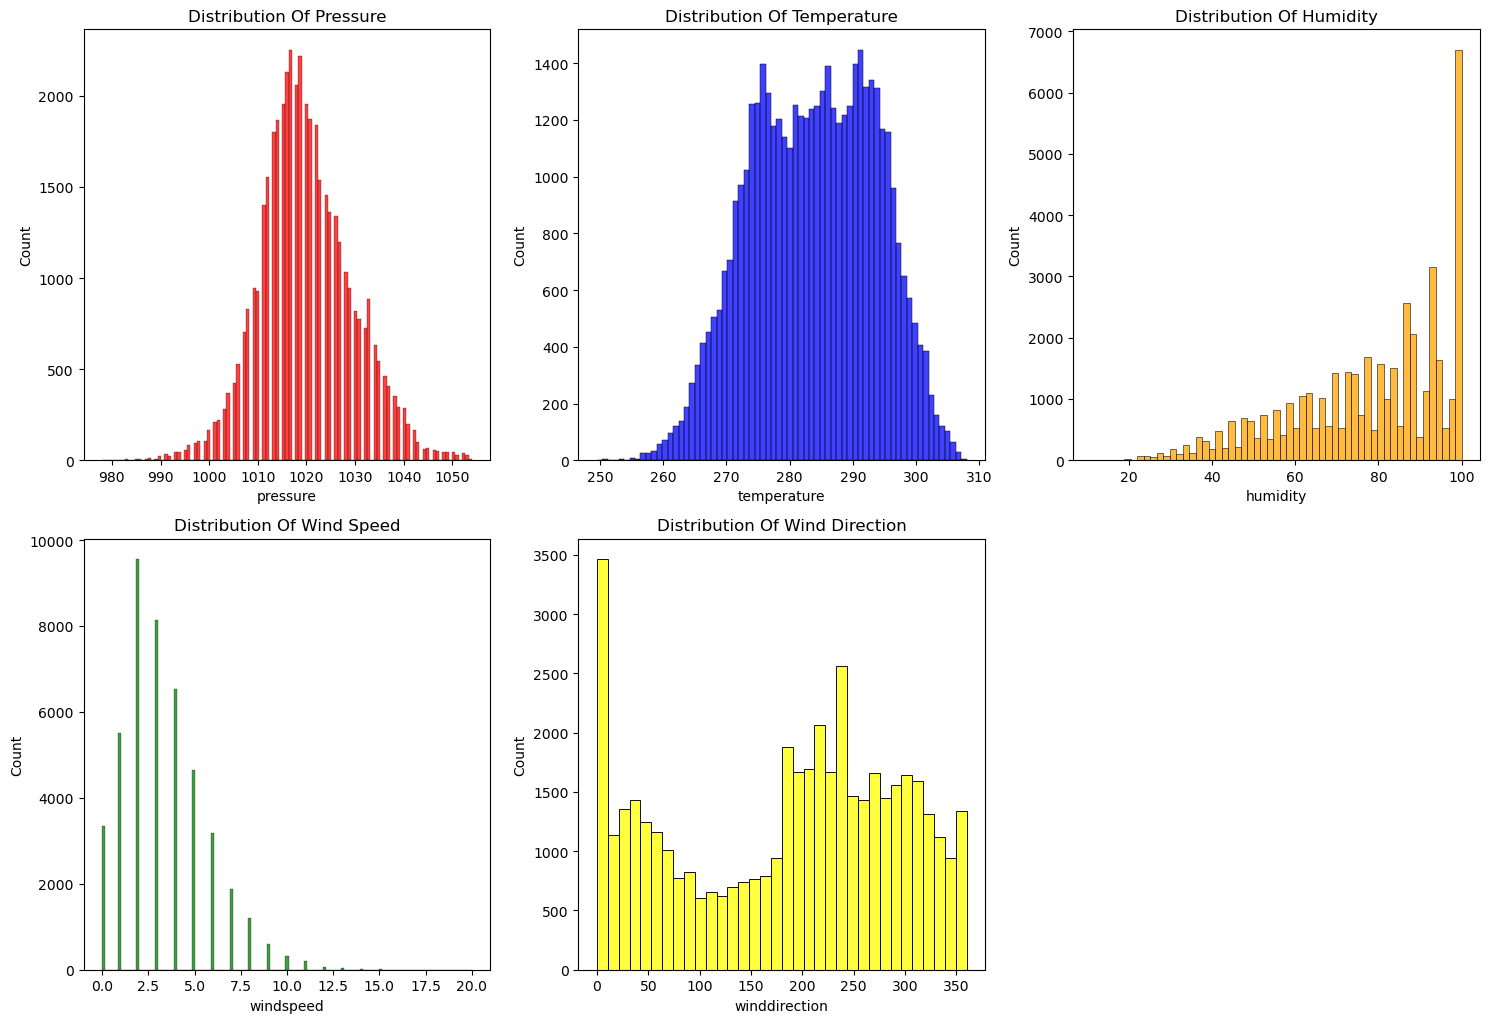

In [24]:
# Visualization to check the distribution of the attributes:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.histplot(Boston['pressure'],color='red')
plt.title('Distribution Of Pressure')

plt.subplot(3,3,2)
sns.histplot(Boston['temperature'],color='blue')
plt.title('Distribution Of Temperature')

plt.subplot(3,3,3)
sns.histplot(Boston['humidity'],color='orange')
plt.title('Distribution Of Humidity')

plt.subplot(3,3,4)
sns.histplot(Boston['windspeed'],color='green')
plt.title('Distribution Of Wind Speed')

plt.subplot(3,3,5)
sns.histplot(Boston['winddirection'],color='yellow')
plt.title('Distribution Of Wind Direction')

plt.tight_layout()
plt.show()

In [25]:
Boston = Boston[Boston.description != 'freezing rain']

Boston = Boston[Boston.description != 'light rain and snow']

Boston = Boston[Boston.description != 'dust']

Boston = Boston[Boston.description != 'heavy intensity drizzle']

In [26]:
# Creating encoder for categorical value of weather
label_descr = LabelEncoder()

# Transforming Column Into Encoded labels
Boston['description'] = label_descr.fit_transform(Boston['description'])

Boston

,humidity,temperature,pressure,windspeed,winddirection,description,day,month,year
0,NaN,NaN,NaN,NaN,NaN,23,1,10,2012
1,68.0,287.170000,1014.0,3.0,60.0,15,1,10,2012
2,68.0,287.186092,1014.0,3.0,60.0,2,1,10,2012
3,68.0,287.231672,1014.0,3.0,60.0,2,1,10,2012
4,68.0,287.277251,1014.0,3.0,60.0,2,1,10,2012
...,...,...,...,...,...,...,...,...,...
45248,37.0,288.080000,1017.0,8.0,290.0,0,29,11,2017
45249,74.0,286.020000,1019.0,6.0,340.0,0,29,11,2017
45250,74.0,283.940000,1019.0,7.0,340.0,0,29,11,2017
45251,56.0,282.170000,1022.0,2.0,330.0,2,29,11,2017


In [27]:
# Feature matrix
X = Boston[['day', 'month', 'year', 'humidity', 'pressure', 'temperature', 'windspeed', 'winddirection']]
# X = frame[['humidity','pressure','temperature','wind_speed','wind_direction']]
X

,day,month,year,humidity,pressure,temperature,windspeed,winddirection
0,1,10,2012,NaN,NaN,NaN,NaN,NaN
1,1,10,2012,68.0,1014.0,287.170000,3.0,60.0
2,1,10,2012,68.0,1014.0,287.186092,3.0,60.0
3,1,10,2012,68.0,1014.0,287.231672,3.0,60.0
4,1,10,2012,68.0,1014.0,287.277251,3.0,60.0
...,...,...,...,...,...,...,...,...
45248,29,11,2017,37.0,1017.0,288.080000,8.0,290.0
45249,29,11,2017,74.0,1019.0,286.020000,6.0,340.0
45250,29,11,2017,74.0,1019.0,283.940000,7.0,340.0
45251,29,11,2017,56.0,1022.0,282.170000,2.0,330.0


In [28]:
# Target variable
# y = frame['temperature'].astype('int')
y = Boston['description']
y

0        23
1        15
2         2
3         2
4         2
         ..
45248     0
45249     0
45250     0
45251     2
45252     0
Name: description, Length: 45241, dtype: int32

In [29]:
# Creating The Object With The Desired Sampling Strategy.
smote = SMOTE(sampling_strategy='not majority')
# fit the object to our training data
X,y = smote.fit_sample(Boston.loc[:,Boston.columns!='description'], Boston['description'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

AttributeError: 'SMOTE' object has no attribute 'fit_sample'